In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
# Assume that X and y have been loaded already from iris data.
# 예를 들어, iris = load_iris(); X = iris.data; y = iris.target; target_names = iris.target_names
# 또는 아래 코드처럼 iris data를 다시 불러올 수도 있습니다.

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data      # (n_samples, 4)
y = iris.target    # (n_samples,)
target_names = iris.target_names

# Select only sepal length and sepal width
X_two = X[:, :2]   # 첫 두 피처 사용

In [3]:
# Split data; test_size=20%로 설정합니다.
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(
    X_two, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train_two.shape)
print("Test set shape:", X_test_two.shape)

Training set shape: (120, 2)
Test set shape: (30, 2)


In [4]:
# Train SVM classifier using the selected two features
svm_two = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_two.fit(X_train_two, y_train_two)

SVC(random_state=42)

In [5]:
# Create a mesh grid based on the range of sepal length and sepal width
x_min, x_max = X_two[:, 0].min() - 1, X_two[:, 0].max() + 1
y_min, y_max = X_two[:, 1].min() - 1, X_two[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict over the grid using the trained SVM model
Z = svm_two.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

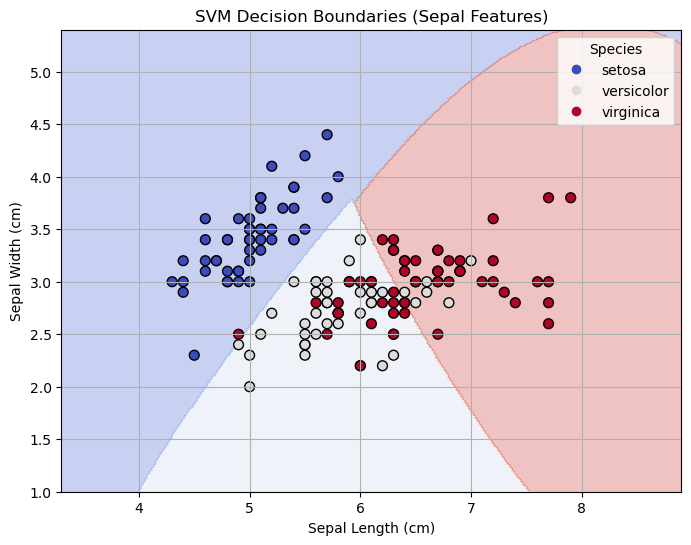

In [6]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the actual data points
scatter = plt.scatter(
    X_two[:, 0], X_two[:, 1],
    c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50
)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("SVM Decision Boundaries (Sepal Features)")

# Legend: Convert target_names (if necessary) to list
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(target_names), title="Species")
plt.grid(True)
plt.show()

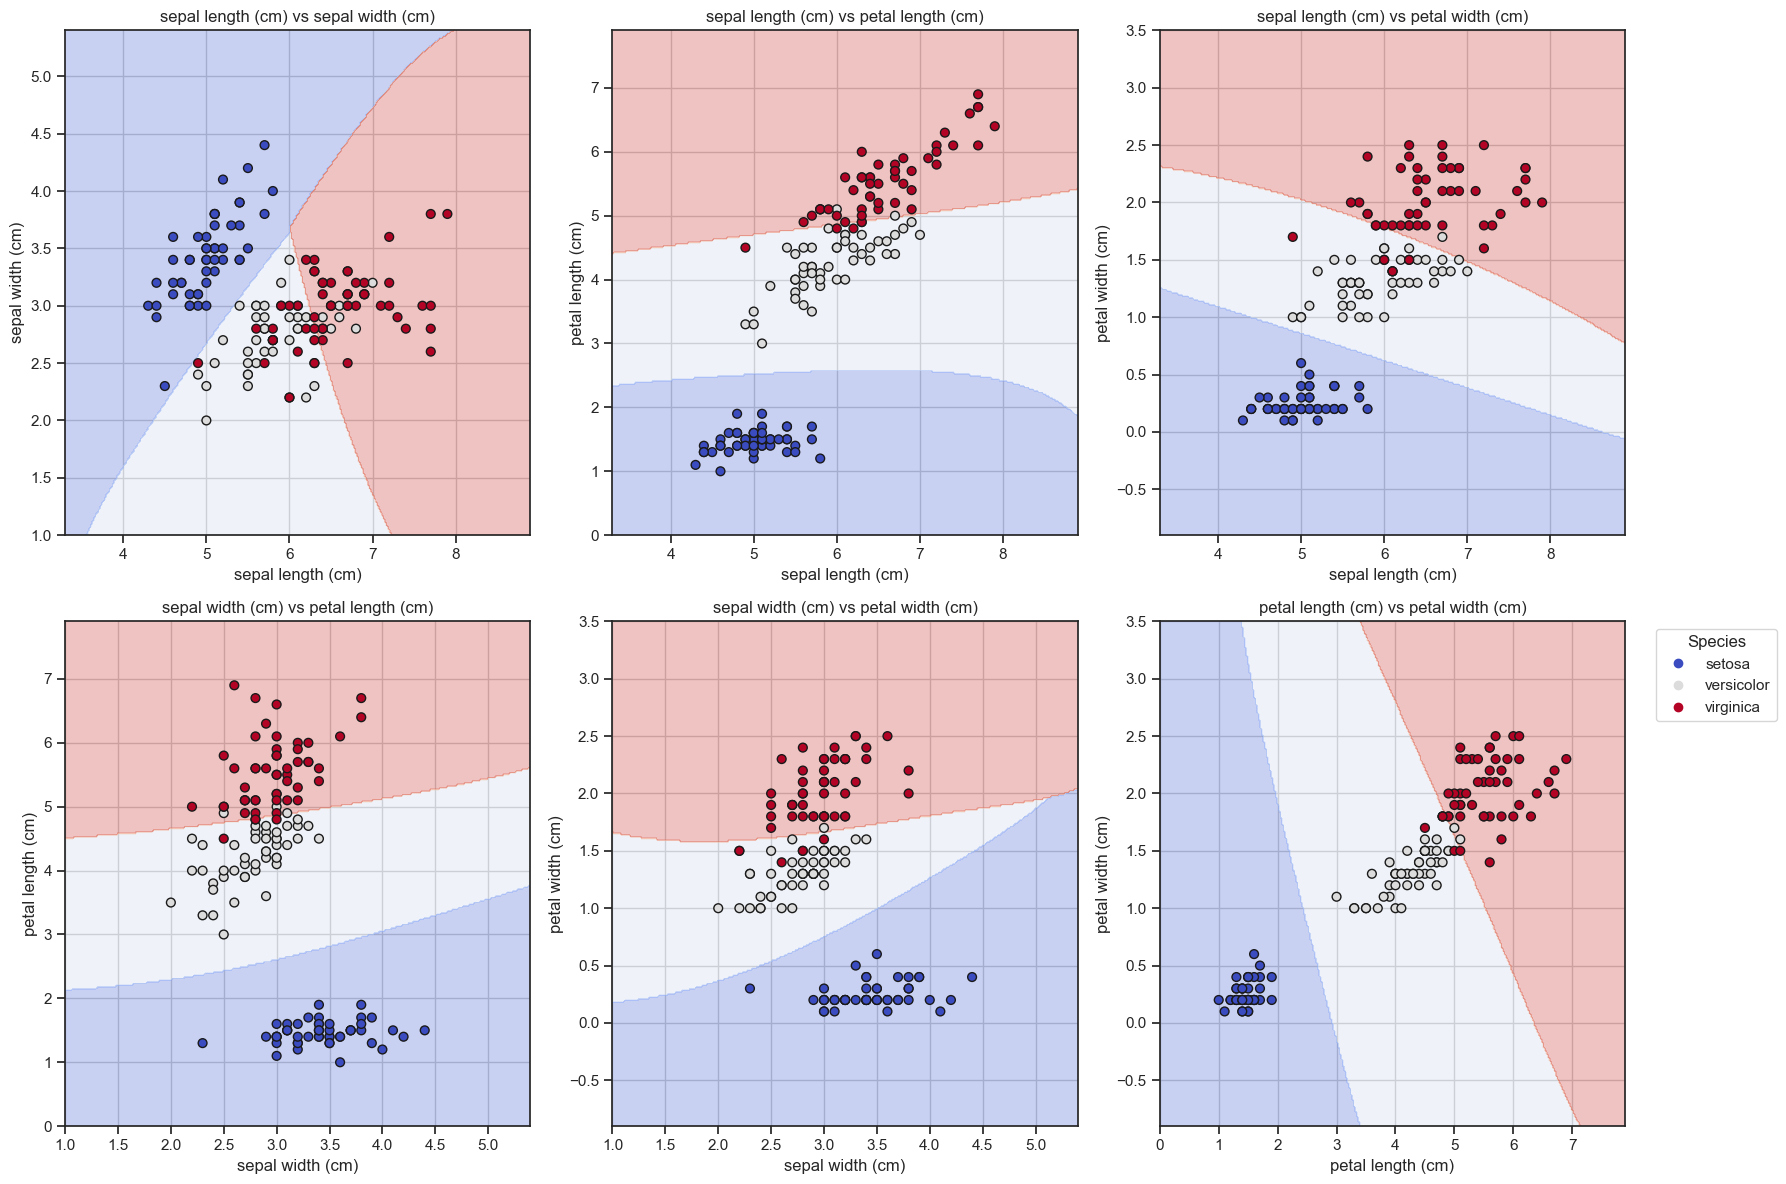

In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Get all pairs of feature indices from 4 features
feature_pairs = list(itertools.combinations(range(4), 2))  # 총 6개의 쌍

plt.figure(figsize=(18, 12))
for idx, (i, j) in enumerate(feature_pairs, 1):
    # Select the pair of features
    X_pair = X[:, [i, j]]
    
    # Train an SVM classifier on the full dataset using only these two features
    svm_pair = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm_pair.fit(X_pair, y)
    
    # Create a mesh grid for decision boundary visualization
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Predict class labels for each point in the mesh grid
    Z = svm_pair.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot the decision boundary and the data points for this feature pair
    plt.subplot(2, 3, idx)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(
        X_pair[:, 0], X_pair[:, 1],
        c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=40
    )
    # Label axes with the corresponding feature names from iris.feature_names
    plt.xlabel(iris.feature_names[i])
    plt.ylabel(iris.feature_names[j])
    plt.title(f"{iris.feature_names[i]} vs {iris.feature_names[j]}")
    plt.grid(True)

# Create a global legend outside subplots
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(target_names), title="Species",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()